In [44]:
from clean_parent import clean_parent, clean_child
from parent_pca import pca_parent_lowrank_approx
from velocity import fit_spline_with_velocity
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import optuna
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [45]:
path = "../adv-ml-2025/gen1_train_comp_final.csv"
parent_wide, parent_long = clean_parent(path)

path = "../adv-ml-2025/gen2_train_comp_final.csv"
child_wide, child_long, child2parent, parent2sex, child2sex = clean_child(path)

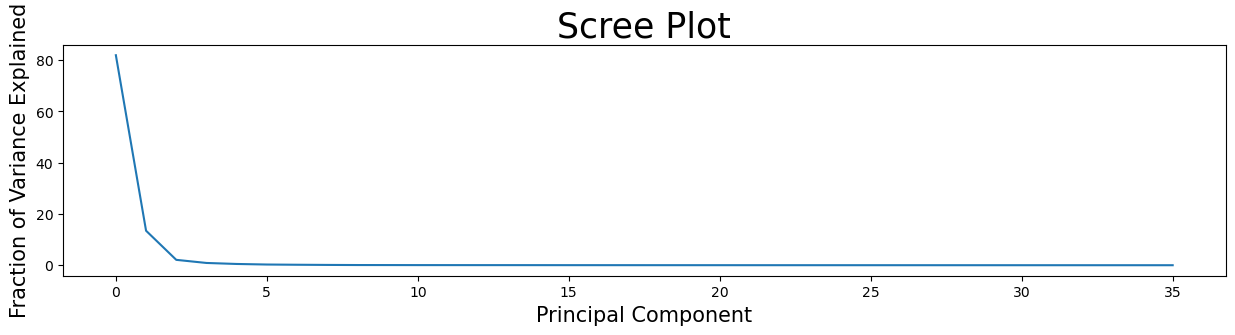

In [46]:
pca = PCA()
pc_scores = pca.fit_transform(parent_wide)

per_var = 100 * pca.explained_variance_ratio_
labels = ["PC" + str(x) for x in range(1, len(per_var))]

plt.figure(figsize=(15, 3))
plt.plot(per_var)
plt.ylabel("Fraction of Variance Explained", fontsize=15)
plt.xlabel("Principal Component", fontsize=15)
plt.title("Scree Plot", fontsize=25)
plt.show()

In [48]:
k = 2

eigenvecs = pca.components_[:k, :]
eigenvecs_df = pd.DataFrame(
    data=eigenvecs.T,
    columns=[r"$\hat{\phi}_1$", r"$\hat{\phi}_2$"],
    index=np.arange(1, 37, 1),
)

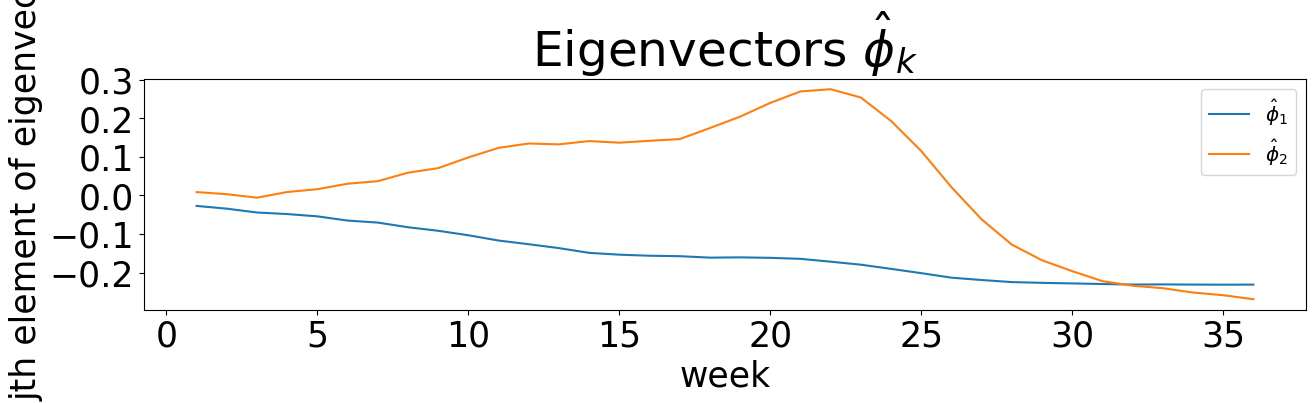

In [49]:
plot = eigenvecs_df.plot(
    figsize=(15, 3), title="Eigenvectors " + r"$\hat{\phi}_k$", fontsize=25
)
plot.title.set_size(35)
plot.set_ylabel("jth element of eigenvec", fontsize=25)
plot.set_xlabel("week", fontsize=25)
plot.legend(loc=1, fontsize="x-large")
fig = plot.get_figure();

In [50]:
low_approx_df, parent_pc_df = pca_parent_lowrank_approx(parent_wide, 99)

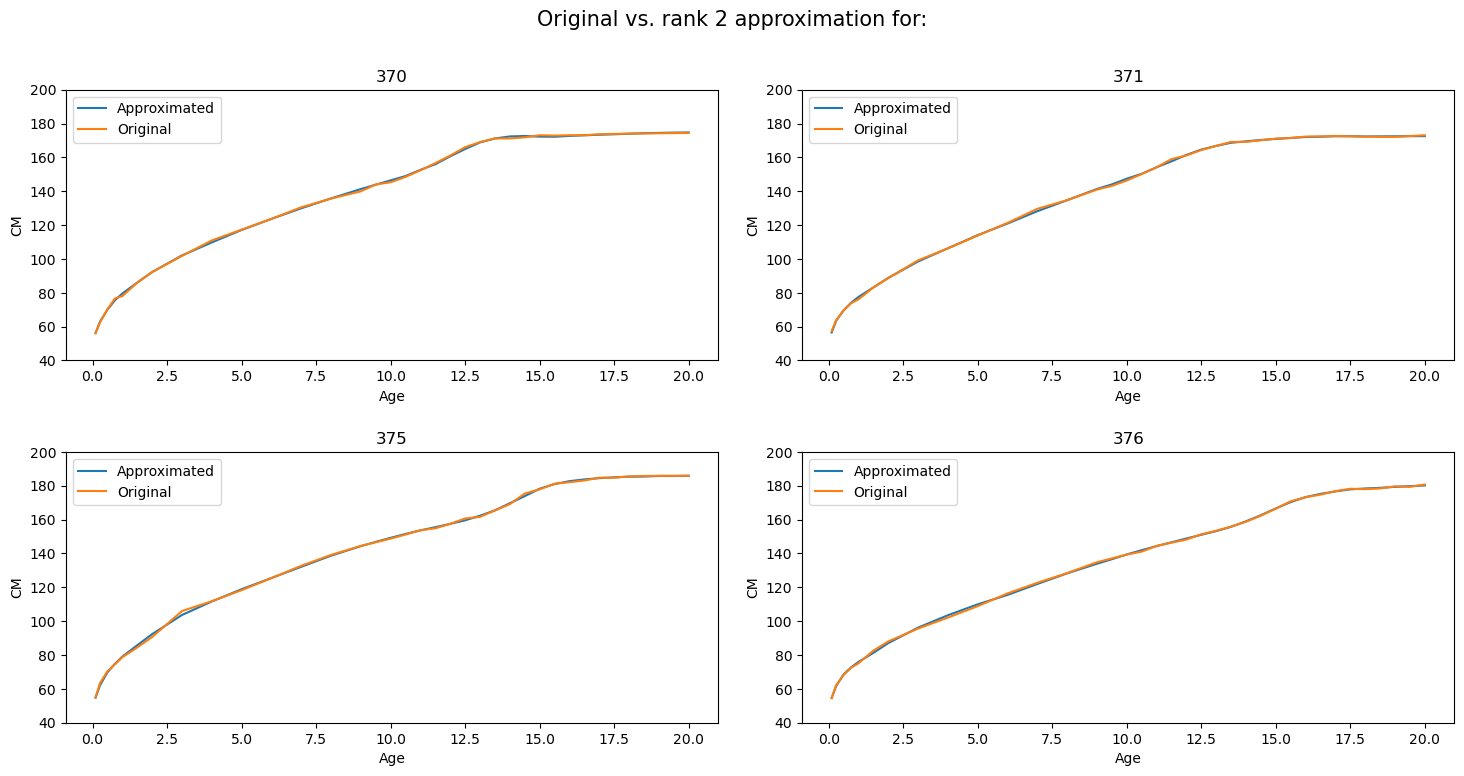

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax = ax.flatten()

parent_list = parent_wide.index[0:4].to_list()
for i in range(len(parent_list)):
    ax[i].plot(
        low_approx_df.columns,
        low_approx_df.loc[parent_list[i], :],
        label="Approximated",
    )
    ax[i].plot(
        parent_wide.columns, parent_wide.loc[parent_list[i], :], label="Original"
    )
    ax[i].set_title(parent_list[i])
    ax[i].set_xlabel("Age")
    ax[i].set_ylabel("CM")
    ax[i].set_ylim(40, 200)  # Set the y-axis limits uniformly across subplots
    ax[i].legend()
plt.suptitle("Original vs. rank 2 approximation for:", fontsize=15)
fig.tight_layout(pad=2.0)
plt.show()